In [71]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn import metrics
import utils

## Four Peaks 

In [2]:
#Define the fourpeaks functions
fitness = mlrose.FourPeaks(t_pct=0.15)
#Description of the problem
problem = mlrose.DiscreteOpt(length = 12, fitness_fn = fitness, maximize = True, max_val = 8)
init_state = np.array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [3]:
# Random Hill Climbing
algo_stats = []
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.random_hill_climb(problem,max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["FourPeaks", "RHC", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime])  
    
# Genetic Algorithm
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.genetic_alg(problem, max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["FourPeaks", "GA", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime]) 
    
# Simulated Annealing
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.simulated_annealing(problem,max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["FourPeaks", "SA", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime]) 

# MIMIC
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.mimic(problem,max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["FourPeaks", "MIMIC", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime]) 

In [4]:
dfstats4peaks = pd.DataFrame(algo_stats, columns=['Problem', 'Algorithm', 'Best_State', 
                                               'Best_Fitness',  'Iterations', 'Fitness', 'Runtime'])

In [98]:
best1 = pd.DataFrame(dfstats4peaks.sort_values(['Best_Fitness', 'Iterations'], ascending=[False, True]).iloc[0])
best1.columns = ['Aspect']
best1

,Aspect
Problem,FourPeaks
Algorithm,GA
Best_State,"[1, 1, 1, 1, 1, 1, 1, 1, 5, 0, 0, 0]"
Best_Fitness,20
Max_Attempts,50
Iterations,112
Fitness,"[3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 15.0, 15.0..."
Runtime,2500.13


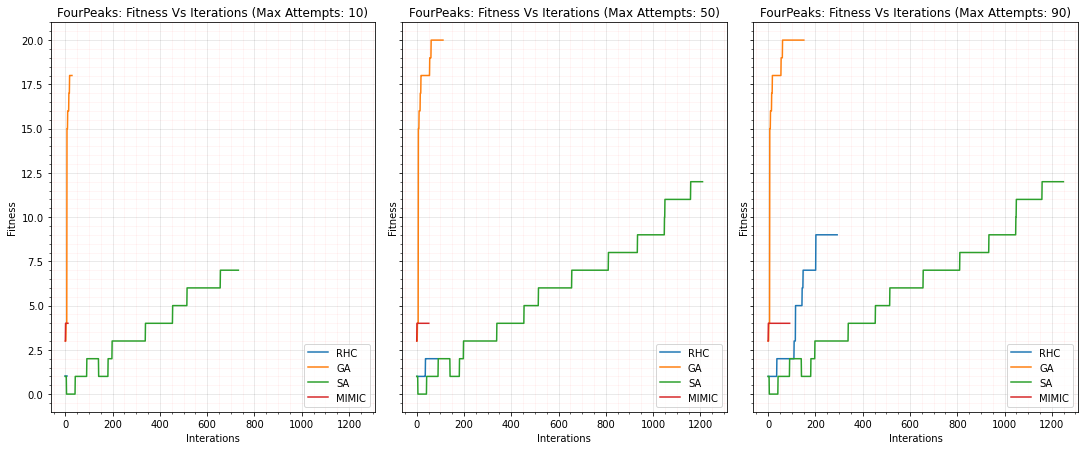

In [121]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.tight_layout()
for ax, maxampts in zip(axs.ravel(), range(10, 110, 40)):
    for i in range(0, dfstats4peaks[dfstats4peaks['Max_Attempts']==maxampts].shape[0]):
        ax.plot(dfstats4peaks[dfstats4peaks['Max_Attempts']==maxampts].iloc[i]['Fitness'],
                label=dfstats4peaks[dfstats4peaks['Max_Attempts']==maxampts].iloc[i]['Algorithm'])
        ax.set_title('FourPeaks: Fitness Vs Iterations (Max Attempts: '+str(maxampts)+')')
        ax.legend(loc='lower right')
        ax.set_xlabel('Interations')
        ax.set_ylabel('Fitness')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)

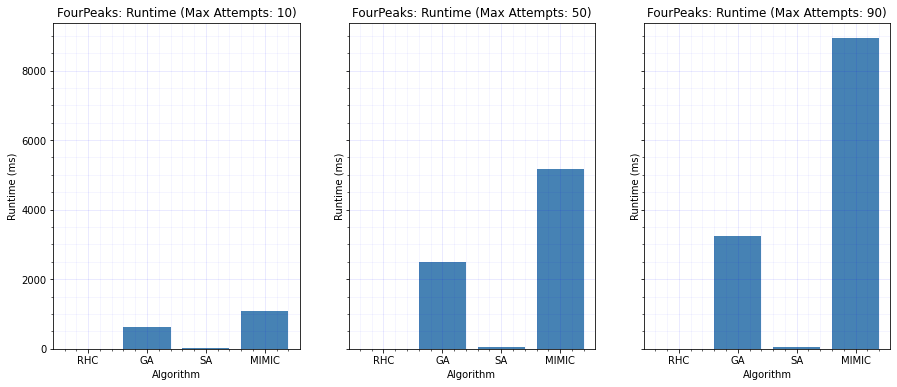

In [122]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
# fig.tight_layout()
for ax, maxampts in zip(axs.ravel(), range(10, 110, 40)):
    for i in range(0, dfstats4peaks[dfstats4peaks['Max_Attempts']==maxampts].shape[0]):
        ax.bar(dfstats4peaks[dfstats4peaks['Max_Attempts']==maxampts]['Algorithm'],
               dfstats4peaks[dfstats4peaks['Max_Attempts']==maxampts]['Runtime'], color = "steelblue")
        ax.set_title('FourPeaks: Runtime (Max Attempts: '+str(maxampts)+')')
        ax.set_xlabel('Algorithm')
        ax.set_ylabel('Runtime (ms)')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='b', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='b', linestyle='-', alpha=0.05)

## *k*-coloring problem

In [8]:
edges = [(0, 1), (0, 2), (0, 4), (1, 3), (2, 0), (2, 3), (3, 4)]
fitness = mlrose.MaxKColor(edges)
#Description of the problem
problem = mlrose.DiscreteOpt(length = 5, fitness_fn = fitness, maximize = True, max_val = 5)

In [9]:
# Random Hill Climbing
algo_stats = []
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.random_hill_climb(problem,max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["KColors", "RHC", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime])  
    
# Genetic Algorithm
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.genetic_alg(problem, max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["KColors", "GA", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime]) 
    
# Simulated Annealing
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.simulated_annealing(problem,max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["KColors", "SA", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime]) 

# MIMIC
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.mimic(problem,max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["KColors", "MIMIC", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime]) 

In [10]:
dfstats_MaxKColor = pd.DataFrame(algo_stats, columns=['Problem', 'Algorithm', 'Best_State', 
                                               'Best_Fitness',  'Iterations', 'Fitness', 'Runtime'])

In [99]:
best2 = pd.DataFrame(dfstats_MaxKColor.sort_values(['Best_Fitness', 'Iterations'], ascending=[False, True]).iloc[0])
best2.columns = ['Aspect']
best2

,Aspect
Problem,KColors
Algorithm,MIMIC
Best_State,"[4, 4, 4, 4, 4]"
Best_Fitness,6
Max_Attempts,10
Iterations,11
Fitness,"[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ..."
Runtime,186.012


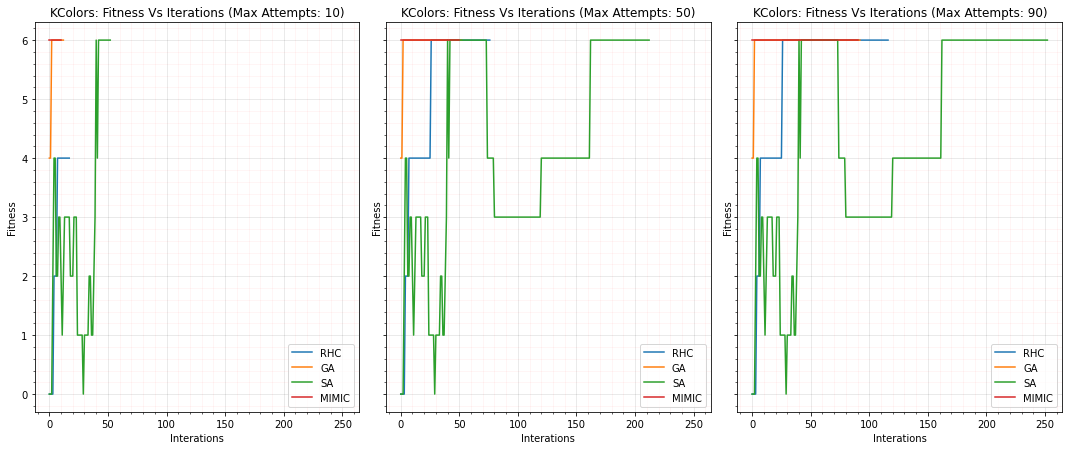

In [12]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
fig.tight_layout()
for ax, maxampts in zip(axs.ravel(), range(10, 110, 40)):
    for i in range(0, dfstats_MaxKColor[dfstats_MaxKColor['Max_Attempts']==maxampts].shape[0]):
        ax.plot(dfstats_MaxKColor[dfstats_MaxKColor['Max_Attempts']==maxampts].iloc[i]['Fitness'],
                label=dfstats_MaxKColor[dfstats_MaxKColor['Max_Attempts']==maxampts].iloc[i]['Algorithm'])
        ax.set_title('KColors: Fitness Vs Iterations (Max Attempts: '+str(maxampts)+')')
        ax.legend(loc='lower right')
        ax.set_xlabel('Interations')
        ax.set_ylabel('Fitness')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)

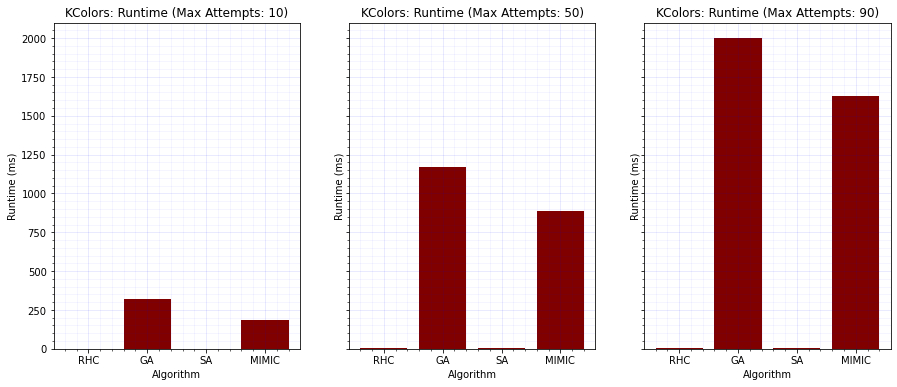

In [123]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='b', sharex=True, sharey=True)
# fig.tight_layout()
for ax, maxampts in zip(axs.ravel(), range(10, 110, 40)):
    for i in range(0, dfstats_MaxKColor[dfstats_MaxKColor['Max_Attempts']==maxampts].shape[0]):
        ax.bar(dfstats_MaxKColor[dfstats_MaxKColor['Max_Attempts']==maxampts]['Algorithm'],
               dfstats_MaxKColor[dfstats_MaxKColor['Max_Attempts']==maxampts]['Runtime'], color = "maroon")
        ax.set_title('KColors: Runtime (Max Attempts: '+str(maxampts)+')')
        ax.set_xlabel('Algorithm')
        ax.set_ylabel('Runtime (ms)')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='b', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='b', linestyle='-', alpha=0.05)

## Travelling SalesMan

In [14]:
size = 6
# define city coordinates
coords_list = [(1, 1), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5)]

# Initialize fitness function object using the coords_list given earlier
fitness = mlrose.TravellingSales(coords = coords_list)

problem = mlrose.TSPOpt(length = size, fitness_fn = fitness, maximize = True)

#### Define the algorithms to solve the traveling salesman problem

In [15]:
# Random Hill Climbing
algo_stats = []
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.random_hill_climb(problem,max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["TSP", "RHC", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime])  
    
# Genetic Algorithm
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.genetic_alg(problem, max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["TSP", "GA", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime]) 
    
# Simulated Annealing
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.simulated_annealing(problem,max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["TSP", "SA", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime]) 
    
# MIMIC
for maxampts in range(10, 110, 40):
    t_start = time.time()*1000.0
    best_state, best_fitness, curve_vals = mlrose.mimic(problem,max_attempts=maxampts,curve=True,random_state=11)
    t_stop = time.time()*1000.0
    runtime = t_stop - t_start
    algo_stats.append(["TSP", "MIMIC", best_state, best_fitness, maxampts, curve_vals.size, curve_vals, runtime]) 

In [16]:
dfstats_TSP = pd.DataFrame(algo_stats, columns=['Problem', 'Algorithm', 'Best_State', 'Best_Fitness',
                                                 'Iterations', 'Fitness', 'Runtime'])

In [100]:
best3 = pd.DataFrame(dfstats_TSP.sort_values(['Best_Fitness', 'Iterations'], ascending=[False, True]).iloc[0])
best3.columns = ['Aspect']
best3

,Aspect
Problem,TSP
Algorithm,GA
Best_State,"[4, 3, 0, 2, 5, 1]"
Best_Fitness,26.8808
Max_Attempts,10
Iterations,11
Fitness,"[26.880816028056742, 26.880816028056742, 26.88..."
Runtime,1807.51


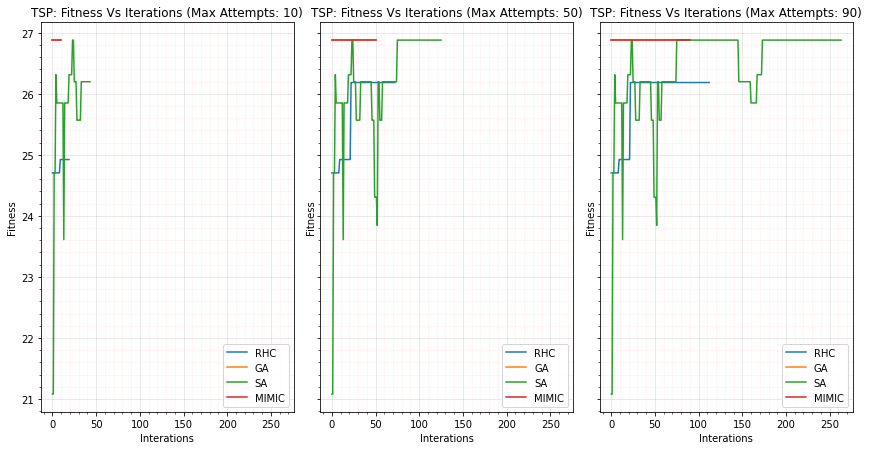

In [101]:
fig, axs = plt.subplots(1,3, figsize=(12, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)

fig.tight_layout()
for ax, maxampts in zip(axs.ravel(), range(10, 110, 40)):
    for i in range(0, dfstats_TSP[dfstats_TSP['Max_Attempts']==maxampts].shape[0]):
        ax.plot(dfstats_TSP[dfstats_TSP['Max_Attempts']==maxampts].iloc[i]['Fitness'], 
                label=dfstats_TSP[dfstats_TSP['Max_Attempts']==maxampts].iloc[i]['Algorithm'])
        ax.set_title('TSP: Fitness Vs Iterations (Max Attempts: '+str(maxampts)+')')
        ax.legend(loc='lower right')
        ax.set_xlabel('Interations')
        ax.set_ylabel('Fitness')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)

In [103]:
dfstats_TSP[dfstats_TSP['Max_Attempts']==maxampts]['Runtime']

2        93.096436
5      5714.085938
8        56.971924
11    11949.333496
Name: Runtime, dtype: float64

In [105]:
dfstats_TSP[dfstats_TSP['Max_Attempts']==maxampts]['Algorithm']

2       RHC
5        GA
8        SA
11    MIMIC
Name: Algorithm, dtype: object

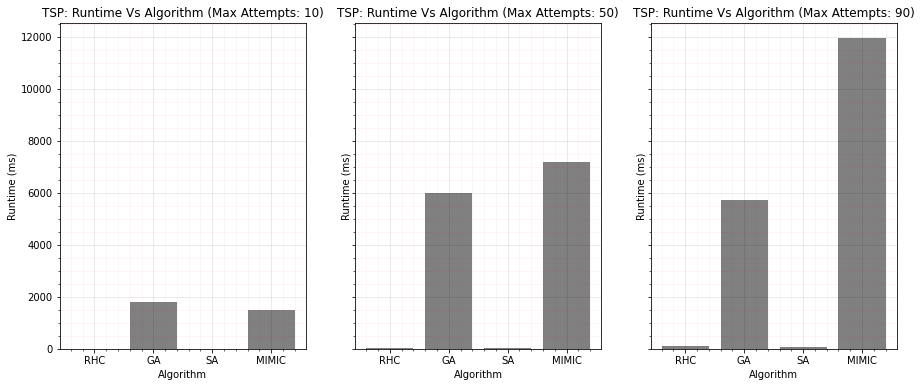

In [102]:
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k', sharex=True, sharey=True)
# fig.tight_layout()
for ax, maxampts in zip(axs.ravel(), range(10, 110, 40)):
    for i in range(0, dfstats_TSP[dfstats_TSP['Max_Attempts']==maxampts].shape[0]):
        ax.bar(dfstats_TSP[dfstats_TSP['Max_Attempts']==maxampts]['Algorithm'],
               dfstats_TSP[dfstats_TSP['Max_Attempts']==maxampts]['Runtime'], color = 'grey')
        ax.set_title('TSP: Runtime Vs Algorithm (Max Attempts: '+str(maxampts)+')')
        ax.set_xlabel('Algorithm')
        ax.set_ylabel('Runtime (ms)')
        ax.minorticks_on()
        ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
        ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)

## Neural Network

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report 
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

#### Import data

In [22]:
#load red wine dataset
dataset_loc_red = "data/winequality-red.csv"
df_red = pd.read_csv(dataset_loc_red, sep=";")

# Categorize wine into "above average" and "below average" wines
df_red["quality"].values[df_red["quality"] <= 5] = 0
df_red["quality"].values[df_red["quality"] > 5] = 1
#Obtain target attribute
Wine_X = df_red.iloc[:,:-1]
Wine_y = df_red.iloc[:,-1]
# Split the data into a train and a test sets
Wine_X_train, Wine_X_test, Wine_y_train, Wine_y_test = train_test_split(Wine_X, Wine_y, random_state=1, test_size=0.30)

In [23]:
#Defdine initial parameters
scaler = StandardScaler()
Wine_X_train = scaler.fit_transform(Wine_X_train)
Wine_X_test = scaler.transform(Wine_X_test)
model_stats=[]
cv=10

### Random Hill Climbing

In [118]:
model_stats=[]
for mi in [100, 500, 1000]:
    for lr in [0.001, 0.01, 1]:
            
        nn_rhc_clf = mlrose.NeuralNetwork(hidden_nodes = [30], activation = 'relu',
                                         algorithm = 'random_hill_climb', max_iters = mi,
                                         bias = True, is_classifier = True, learning_rate = lr, 
                                         random_state = 100)

        t_start = time.time()*1000.0
        nn_rhc_clf = nn_rhc_clf.fit(Wine_X_train, Wine_y_train)
        t_stop = time.time()*1000.0
        traintime = t_stop - t_start

        t_start = time.time()*1000.0
        Wine_y_pred = cross_val_predict(nn_rhc_clf, Wine_X_train, Wine_y_train, cv=cv,)
        t_stop = time.time()*1000.0
        testtime = t_stop - t_start

        prscore = precision_score(Wine_y_train, Wine_y_pred, average='binary')
        rcscore = recall_score(Wine_y_train, Wine_y_pred, average='binary')
        f1score = f1_score(Wine_y_train, Wine_y_pred, average='binary')
        fpr, tpr, thresholds = metrics.roc_curve(Wine_y_train, Wine_y_pred)
        auc = metrics.auc(fpr, tpr)
        accuracy = accuracy_score(Wine_y_train, Wine_y_pred)

        # MI=100, MA=10, LR=0.001
        model_stats.append(['RHC', mi, lr, "{:.2f}".format(accuracy), "{:.2f}".format(prscore), "{:.2f}".format(rcscore),
                                "{:.2f}".format(f1score), "{:.2f}".format(auc), traintime, testtime])

In [119]:
dfstats_RHC = pd.DataFrame(model_stats, columns= ['Model', 'Max_Iterations', 'Learn_rate','Accuracy',
                                                  'PRScore','RCScore', 'F1Score','AUC', 'TrainTime', 'TestTime'])
RHCC = pd.DataFrame(dfstats_RHC.sort_values(['F1Score', 'TestTime'], ascending=[False, True]).iloc[0])
RHCC.columns = ['Model 1']
RHCC

,Model 1
Model,RHC
Max_Iterations,1000
Learn_rate,1
Accuracy,0.74
PRScore,0.76
RCScore,0.75
F1Score,0.75
AUC,0.73
TrainTime,1897.82
TestTime,21177.9


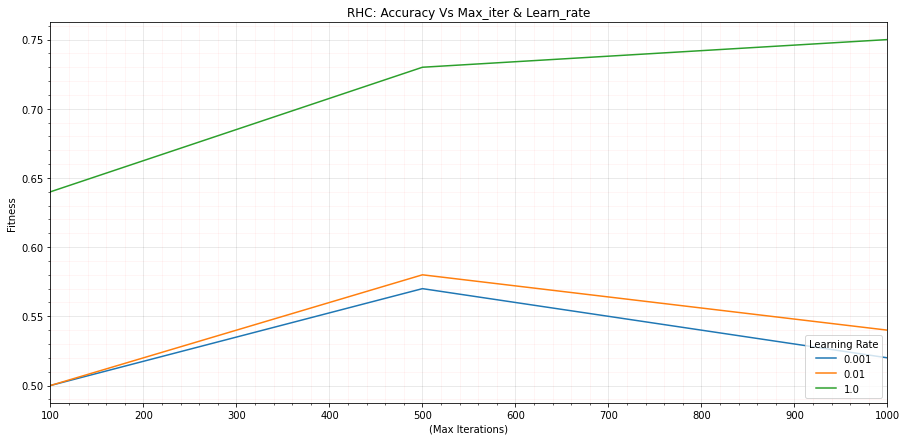

In [94]:
dfstats_RHC[['Accuracy','PRScore','RCScore','F1Score','AUC']] = dfstats_RHC[['Accuracy','PRScore','RCScore','F1Score','AUC']].astype(float)
fig, ax = plt.subplots(figsize = (15,7))
dfstats_RHC.groupby(['Max_Iterations','Learn_rate']).max()['F1Score'].unstack().plot(ax=ax)

plt.title('RHC: Accuracy Vs Max_iter & Learn_rate')
plt.legend(loc = 'lower right', title="Learning Rate")
plt.xlabel('(Max Iterations)')
plt.ylabel('Fitness')
plt.minorticks_on()
plt.grid(b = True, which='major', color = 'k', linestyle='-', alpha=0.1)
plt.grid(b = True, which='minor', color = 'r', linestyle='-', alpha=0.05)
plt.show();

### Simulated Annealing

In [116]:
model_stats=[]
for mi in [100, 500, 1000]:
    for lr in [0.001, 0.01, 1]:
            
        nn_rhc_clf = mlrose.NeuralNetwork(hidden_nodes = [30], activation = 'relu',
                                         algorithm = 'simulated_annealing', max_iters = mi,
                                         bias = True, is_classifier = True, learning_rate = lr, 
                                         random_state = 100)

        t_start = time.time()*1000.0
        nn_rhc_clf = nn_rhc_clf.fit(Wine_X_train, Wine_y_train)
        t_stop = time.time()*1000.0
        traintime = t_stop - t_start

        t_start = time.time()*1000.0
        Wine_y_pred = cross_val_predict(nn_rhc_clf, Wine_X_train, Wine_y_train, cv=cv,)
        t_stop = time.time()*1000.0
        testtime = t_stop - t_start

        prscore = precision_score(Wine_y_train, Wine_y_pred, average='binary')
        rcscore = recall_score(Wine_y_train, Wine_y_pred, average='binary')
        f1score = f1_score(Wine_y_train, Wine_y_pred, average='binary')
        fpr, tpr, thresholds = metrics.roc_curve(Wine_y_train, Wine_y_pred)
        auc = metrics.auc(fpr, tpr)
        accuracy = accuracy_score(Wine_y_train, Wine_y_pred)

        # MI=100, MA=10, LR=0.001
        model_stats.append(['Simulated Annealing', mi,  lr, "{:.2f}".format(accuracy), "{:.2f}".format(prscore), "{:.2f}".format(rcscore),
                                "{:.2f}".format(f1score), "{:.2f}".format(auc), traintime, testtime])

In [117]:
dfstats_SA = pd.DataFrame(model_stats, columns= ['Model', 'Max_Iterations', 'Learn_rate','Accuracy', 'PRScore',
                                                'RCScore', 'F1Score','AUC', 'TrainTime', 'TestTime'])
SAA = pd.DataFrame(dfstats_SA.sort_values(['F1Score', 'TestTime'], ascending=[False, True]).iloc[0])
SAA.columns = ['Model 2']
SAA

,Model 2
Model,Simulated Annealing
Max_Iterations,1000
Learn_rate,1
Accuracy,0.72
PRScore,0.74
RCScore,0.75
F1Score,0.74
AUC,0.72
TrainTime,2773.28
TestTime,21481.7


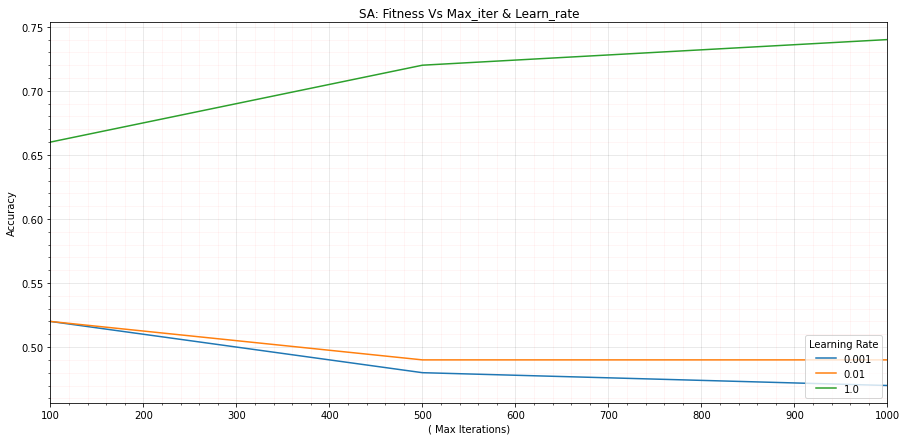

In [93]:
dfstats_SA[['Accuracy','PRScore','RCScore','F1Score','AUC']]=dfstats_SA[['Accuracy','PRScore','RCScore','F1Score','AUC']].astype(float)
fig, ax = plt.subplots(figsize=(15,7))
dfstats_SA.groupby(['Max_Iterations','Learn_rate']).max()['F1Score'].unstack().plot(ax=ax)

plt.title('SA: Fitness Vs Max_iter & Learn_rate')
plt.legend(loc='lower right', title="Learning Rate")
plt.xlabel('( Max Iterations)')
plt.ylabel('Accuracy')
plt.minorticks_on()
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
plt.show()

### Genetic Algorithm

In [86]:
model_stats=[]
for mi in [100, 500, 1000]:
    for lr in [0.001, 0.01, 1]:
            
        nn_rhc_clf = mlrose.NeuralNetwork(hidden_nodes = [30], activation = 'relu',
                                         algorithm = 'genetic_alg', max_iters = mi,
                                         bias = True, is_classifier = True, learning_rate = lr, 
                                         random_state = 100)

        t_start = time.time()*1000.0
        nn_rhc_clf = nn_rhc_clf.fit(Wine_X_train, Wine_y_train)
        t_stop = time.time()*1000.0
        traintime = t_stop - t_start

        t_start = time.time()*1000.0
        Wine_y_pred = cross_val_predict(nn_rhc_clf, Wine_X_train, Wine_y_train, cv=cv,)
        t_stop = time.time()*1000.0
        testtime = t_stop - t_start

        prscore = precision_score(Wine_y_train, Wine_y_pred, average='binary')
        rcscore = recall_score(Wine_y_train, Wine_y_pred, average='binary')
        f1score = f1_score(Wine_y_train, Wine_y_pred, average='binary')
        fpr, tpr, thresholds = metrics.roc_curve(Wine_y_train, Wine_y_pred)
        auc = metrics.auc(fpr, tpr)
        accuracy = accuracy_score(Wine_y_train, Wine_y_pred)

        # MI=100, MA=10, LR=0.001
        model_stats.append(['Genetic Algorithm', mi,  lr, "{:.2f}".format(accuracy), "{:.2f}".format(prscore), "{:.2f}".format(rcscore),
                                "{:.2f}".format(f1score), "{:.2f}".format(auc), traintime, testtime])

In [108]:
dfstats_GA = pd.DataFrame(model_stats, columns= ['Model',  'Max_Iterations', 'Learn_rate','Accuracy',
                                                  'PRScore','RCScore', 'F1Score','AUC', 'TrainTime', 'TestTime'])
GAA = pd.DataFrame(dfstats_GA.sort_values(['F1Score', 'TestTime'], ascending=[False, True]).iloc[0])
GAA.columns = ['Model 3']
GAA

,Model 3
Model,Genetic Algorithm
Max_Iterations,1000
Learn_rate,1
Accuracy,0.74
PRScore,0.76
RCScore,0.75
F1Score,0.75
AUC,0.73
TrainTime,495770
TestTime,22392.3


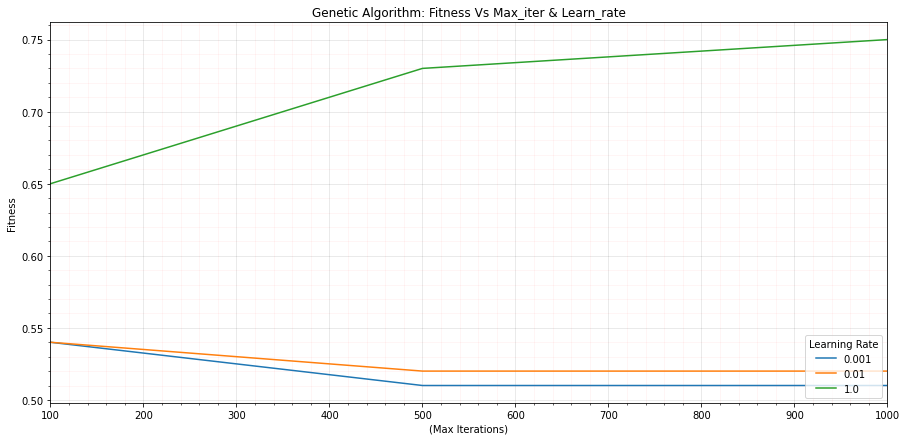

In [92]:
dfstats_GA[['PRScore','RCScore','F1Score']]=dfstats_GA[['PRScore','RCScore','F1Score']].astype(float)
fig, ax = plt.subplots(figsize=(15,7))
dfstats_GA.groupby(['Max_Iterations','Learn_rate']).max()['F1Score'].unstack().plot(ax=ax)

plt.title('Genetic Algorithm: Fitness Vs Max_iter & Learn_rate')
plt.legend(loc='lower right', title="Learning Rate")
plt.xlabel('(Max Iterations)')
plt.ylabel('Fitness')
plt.minorticks_on()
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.1)
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.05)
plt.show()

#### Model Performance

In [120]:
perf = RHCC
perf['Model 2'] = SAA['Model 2']
perf['Model 3'] = GAA['Model 3']
perf

,Model 1,Model 2,Model 3
Model,RHC,Simulated Annealing,Genetic Algorithm
Max_Iterations,1000,1000,1000
Learn_rate,1,1,1
Accuracy,0.74,0.72,0.74
PRScore,0.76,0.74,0.76
RCScore,0.75,0.75,0.75
F1Score,0.75,0.74,0.75
AUC,0.73,0.72,0.73
TrainTime,1897.82,2773.28,495770
TestTime,21177.9,21481.7,22392.3
